In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
games = pd.read_csv("data.csv", header=None)
games.head()

,0,1,2,3,4
0,15,66,237,0,Strategy
1,21,60,238,0,Platformer
2,14,78,176,1,Strategy
3,10,67,216,1,Strategy
4,19,69,185,1,RPG


In [4]:
games.columns = ["Age", "Height", "Weight", "Gender", "Genre"]
games.head()

,Age,Height,Weight,Gender,Genre
0,15,66,237,0,Strategy
1,21,60,238,0,Platformer
2,14,78,176,1,Strategy
3,10,67,216,1,Strategy
4,19,69,185,1,RPG


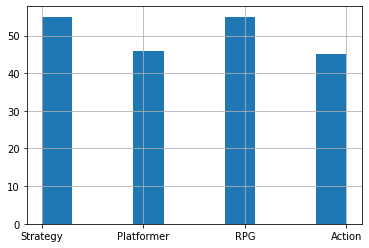

In [8]:
games["Genre"].hist()
plt.show()